In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='ticks')

## Conditional small multiples

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


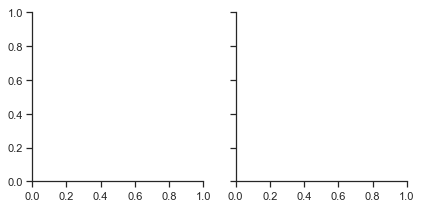

In [4]:
# initialising the grid
g = sns.FacetGrid(tips, col='time')

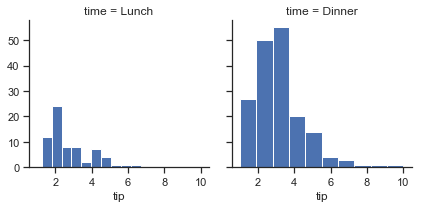

In [7]:
# plotting
g = sns.FacetGrid(tips, col='time')
g.map(plt.hist, "tip")

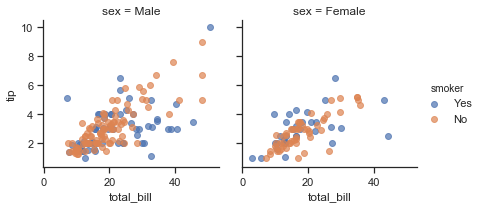

In [8]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip', alpha=0.7)
g.add_legend()

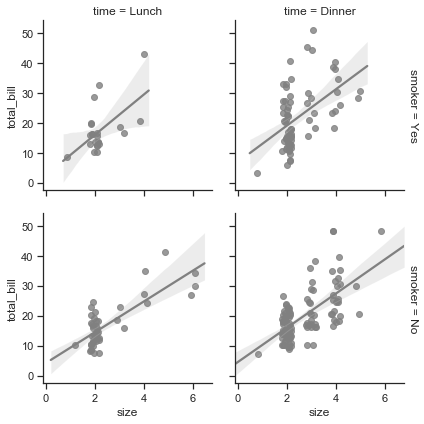

In [9]:
g = sns.FacetGrid(tips, row='smoker', col='time', margin_titles=True)
g.map(sns.regplot, 'size', 'total_bill', color='0.5', x_jitter=0.2)

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


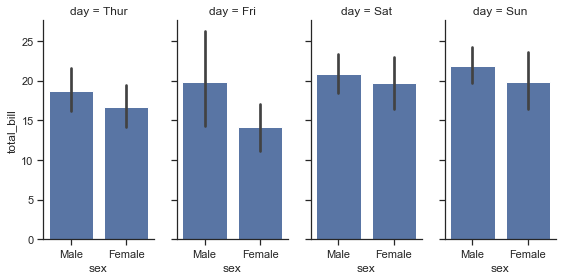

In [10]:
g = sns.FacetGrid(tips, col='day', height=4, aspect=0.5)
g.map(sns.barplot, 'sex', 'total_bill')

In [11]:
ordered_days = tips.day.value_counts().index
ordered_days

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

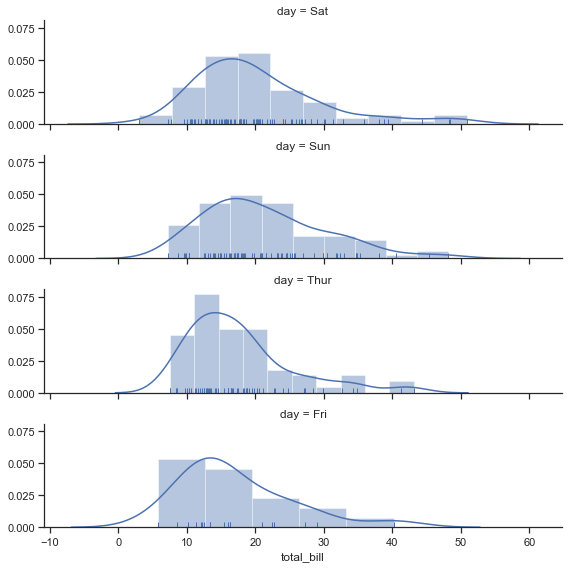

In [20]:
g = sns.FacetGrid(tips, row='day', row_order=ordered_days, height=2, aspect=4)
g.map(sns.distplot, 'total_bill', rug=True)

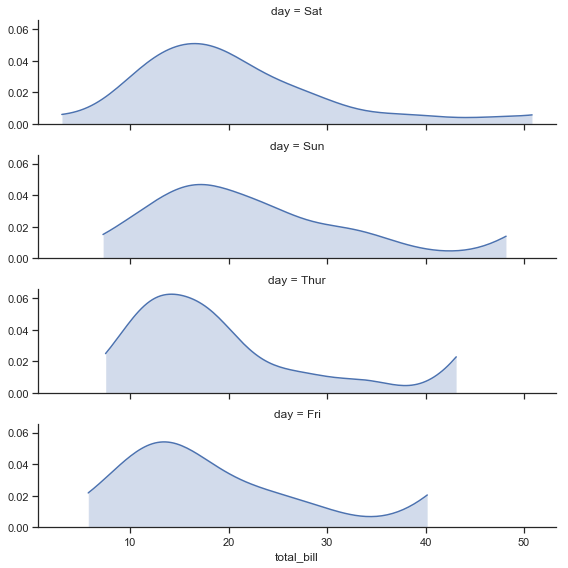

In [21]:
g = sns.FacetGrid(tips, row='day', row_order=ordered_days, height=2, aspect=4)
g.map(sns.kdeplot, 'total_bill', shade=True, cut=0)

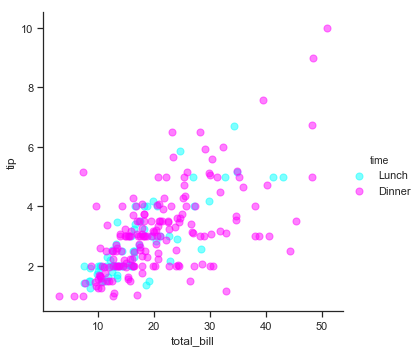

In [22]:
# color palette
pal = dict(Lunch='cyan', Dinner='magenta')
g = sns.FacetGrid(tips, hue='time', palette=pal, height=5)
g.map(plt.scatter, 'total_bill', 'tip', s=50, alpha=0.5)
g.add_legend()

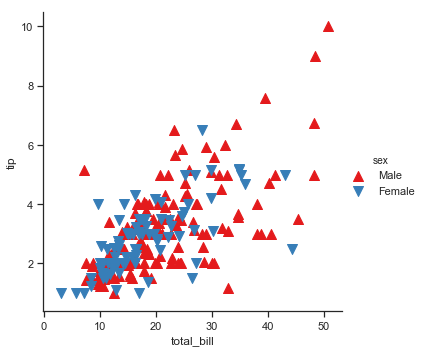

In [24]:
# keyword values in hue
g = sns.FacetGrid(tips, hue='sex', palette='Set1', height=5, 
                  hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, 'total_bill', 'tip', s=100)
g.add_legend()

In [25]:
attend = sns.load_dataset('attention')
attend.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [26]:
attend = attend.query('subject <= 12')
attend.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


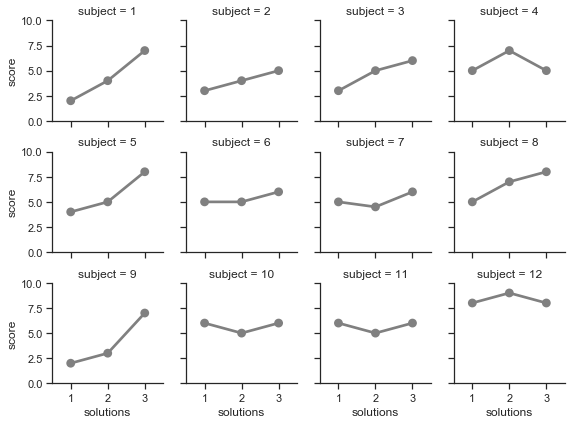

In [27]:
g = sns.FacetGrid(attend, col='subject', col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, 'solutions', 'score', color='0.5', ci=None)

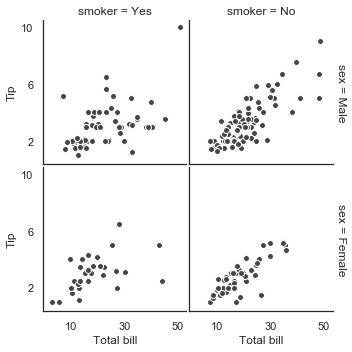

In [29]:
# set methods
with sns.axes_style('white'):
    g = sns.FacetGrid(tips, row='sex', col='smoker', margin_titles=True,
                     height=2.5)

g.map(plt.scatter, 'total_bill', 'tip', color='#454647', edgecolor='white')
g.set_axis_labels('Total bill', 'Tip')
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=0.02, hspace=0.02)

## Using custom functions

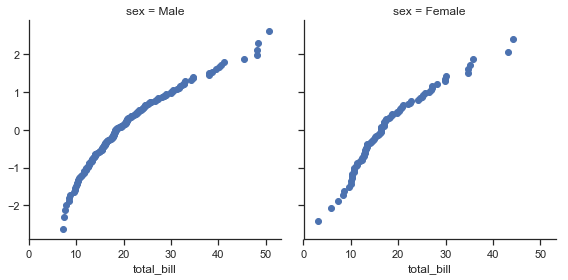

In [30]:
# plotting single vector of data

from scipy import stats

# defining function
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    

g = sns.FacetGrid(tips, col='sex', height=4)
g.map(quantile_plot, 'total_bill')

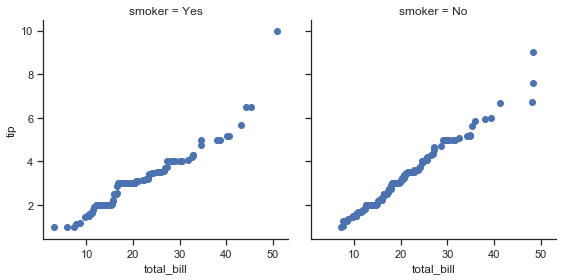

In [31]:
# bivariate plot

def qqplot(x, y, **kwargs):
    _,xr = stats.probplot(x, fit=False)
    _,yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)
    

g = sns.FacetGrid(tips, col='smoker', height=4)
g.map(qqplot, 'total_bill', 'tip')

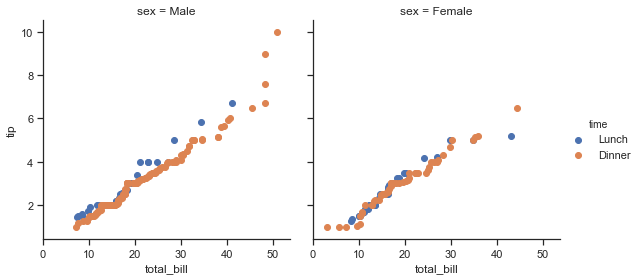

In [33]:
# hue parameter
g = sns.FacetGrid(tips, hue='time', col='sex', height=4)
g.map(qqplot, 'total_bill', 'tip')
g.add_legend()

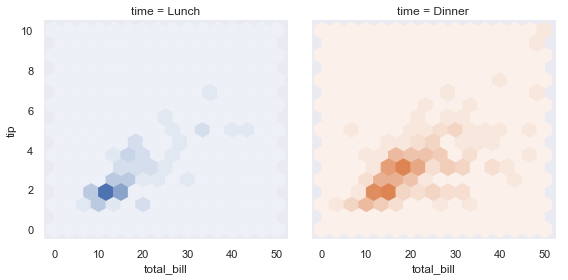

In [34]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
    

with sns.axes_style('dark'):
    g = sns.FacetGrid(tips, hue='time', col='time', height=4)
    
g.map(hexbin, 'total_bill', 'tip', extent=[0, 50, 0, 10])

## Plotting pairwise data relationships

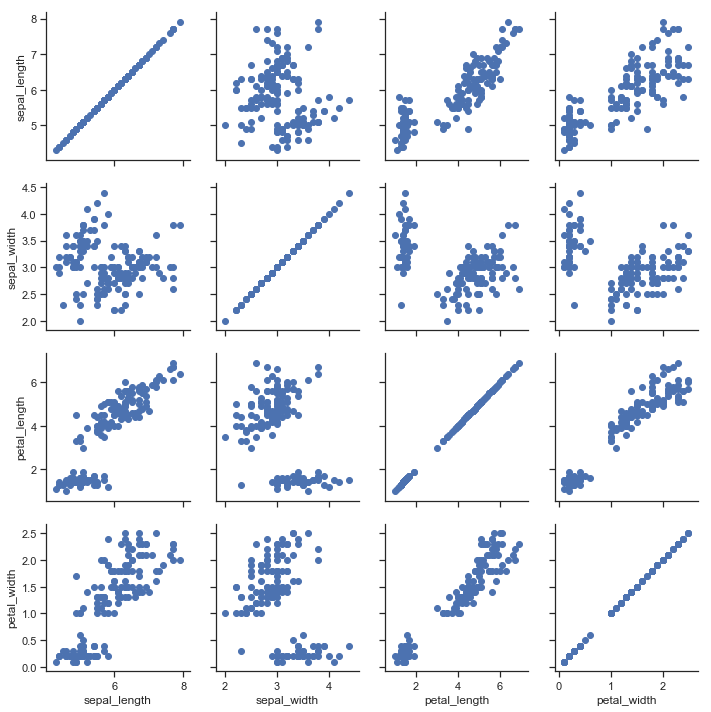

In [35]:
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris)
g.map(plt.scatter)

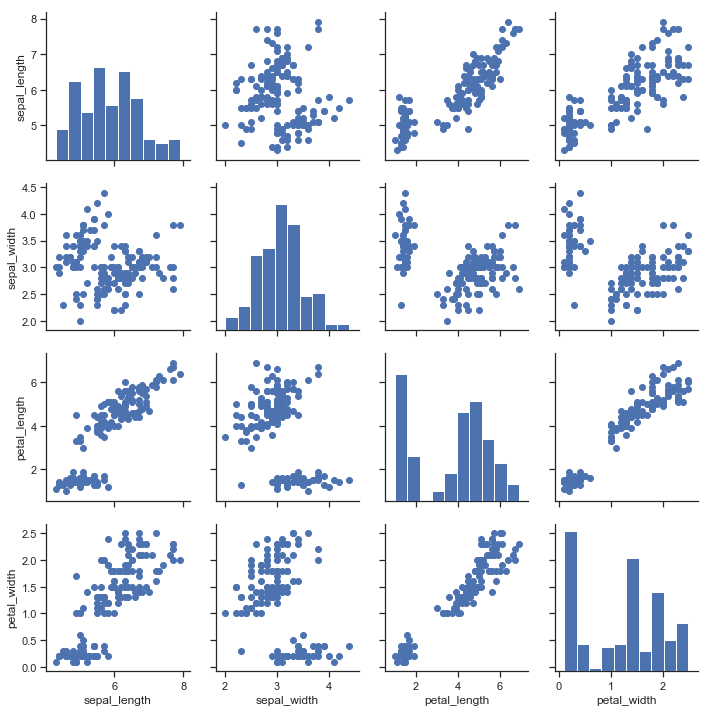

In [36]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

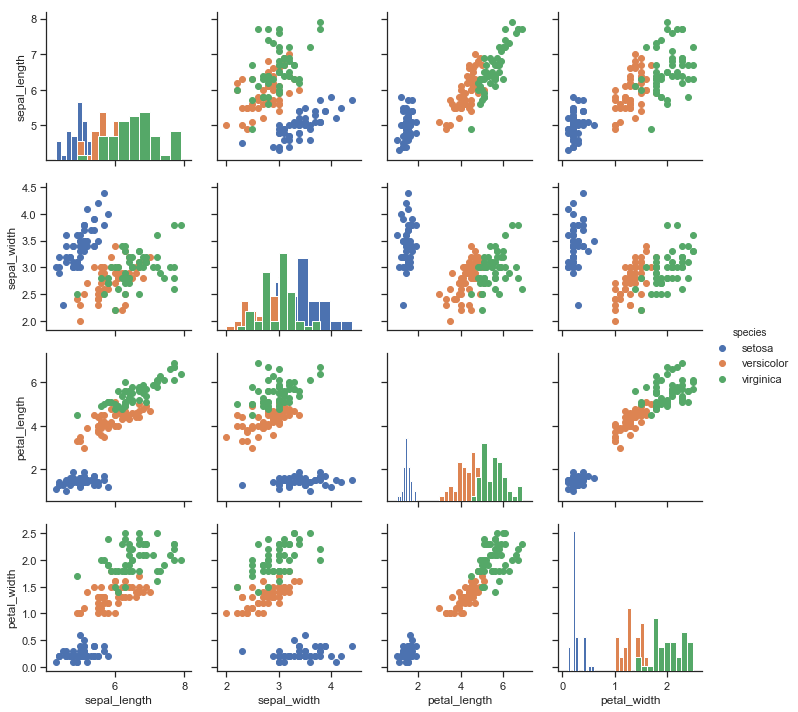

In [37]:
g = sns.PairGrid(iris, hue='species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

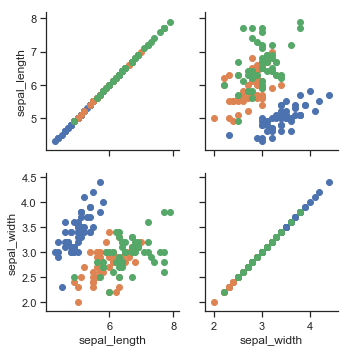

In [38]:
# using only few columns
g = sns.PairGrid(iris, vars=['sepal_length', 'sepal_width'], hue='species')
g.map(plt.scatter)

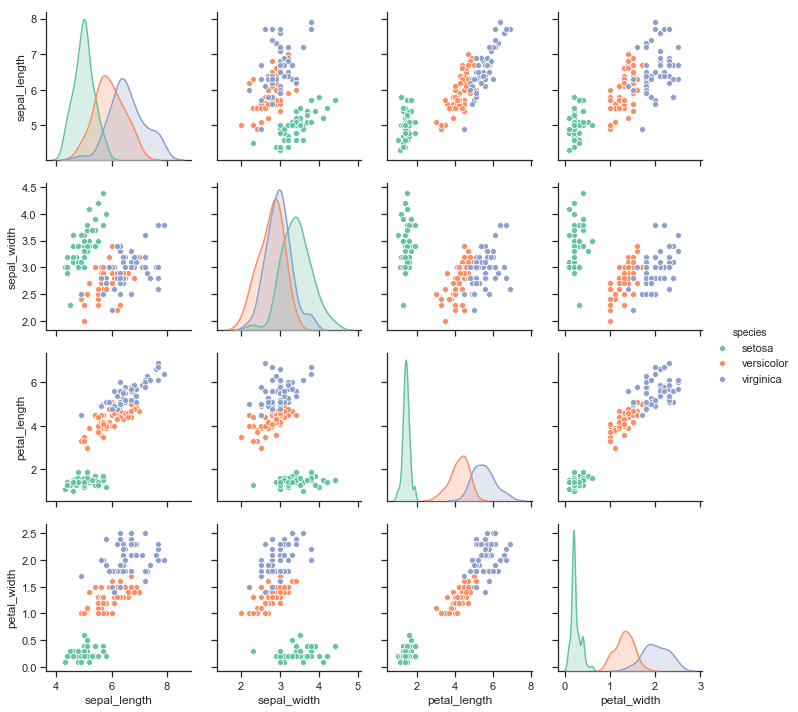

In [39]:
g = sns.pairplot(iris, hue='species', palette='Set2', diag_kind='kde')